# Let's make some nice figures

In [84]:
# Dependencies
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable


import numpy as np
import pandas as pd
import xarray as xr
import math
import gsw

import mixsea as mx




In [71]:
mpl.rcParams.update({
    'font.size': 18+8,           # Default font size
    'axes.labelsize': 18+8,      # Font size for axis labels
    'axes.titlesize': 20+8,      # Font size for titles
    'xtick.labelsize': 16+8,     # Font size for x-axis ticks
    'ytick.labelsize': 16+8,     # Font size for y-axis ticks
    'legend.fontsize': 16+8,     # Font size for legend
    'figure.titlesize': 22+8     # Font size for figure titles
})

In [5]:
# Load ADCP Data
datadir = 'data/2023/adcp/'
filepath_adcp = datadir+'2023_os75nb_cleaned.nc'
ADCP_2023 = xr.open_dataset(filepath_adcp, decode_times=False)

# Load CTD Cast Data
datadir = 'data/2023/ctd/cleaned/'
filepath_P = 'P.csv' # pressure
filepath_T = 'T.csv' # temperature
filepath_S = 'S.csv' # salinity
filepath_D = 'D.csv' # density

P_2023 = pd.read_csv(datadir + filepath_P)
T_2023 = pd.read_csv(datadir + filepath_T)
S_2023 = pd.read_csv(datadir + filepath_S)
D_2023 = pd.read_csv(datadir + filepath_D)

# Load Interpolated CTD Data
datadir = 'data/2023/ctd/cleaned/interpolated dataframes/'
filepath_P_int = 'P_int.csv' # pressure
filepath_T_int = 'T_int.csv' # temperature
filepath_S_int = 'S_int.csv' # salinity
filepath_D_int = 'D_int.csv' # density
filepath_lat = 'lat_df.csv' # latitude matrix

P_int_2023 = pd.read_csv(datadir + filepath_P_int)
T_int_2023 = pd.read_csv(datadir + filepath_T_int)
S_int_2023 = pd.read_csv(datadir + filepath_S_int)
D_int_2023 = pd.read_csv(datadir + filepath_D_int)
lat_matrix_2023 = pd.read_csv(datadir + filepath_lat)

# Load ADCP Data
datadir = 'data/2024/adcp/'
filepath_adcp = datadir+'2024_os75nb_cleaned.nc'
ADCP_2024 = xr.open_dataset(filepath_adcp, decode_times=False)

# Load CTD Cast Data
datadir = 'data/2024/ctd/cleaned/'
filepath_P = 'P.csv' # pressure
filepath_T = 'T.csv' # temperature
filepath_S = 'S.csv' # salinity
filepath_D = 'D.csv' # density

P_2024 = pd.read_csv(datadir + filepath_P)
T_2024 = pd.read_csv(datadir + filepath_T)
S_2024 = pd.read_csv(datadir + filepath_S)
D_2024 = pd.read_csv(datadir + filepath_D)

# Load Interpolated CTD Data
datadir = 'data/2024/ctd/cleaned/interpolated dataframes/'
filepath_P_int = 'P_int.csv' # pressure
filepath_T_int = 'T_int.csv' # temperature
filepath_S_int = 'S_int.csv' # salinity
filepath_D_int = 'D_int.csv' # density
filepath_lat = 'lat_df.csv' # latitude matrix

P_int_2024 = pd.read_csv(datadir + filepath_P_int)
T_int_2024 = pd.read_csv(datadir + filepath_T_int)
S_int_2024 = pd.read_csv(datadir + filepath_S_int)
D_int_2024 = pd.read_csv(datadir + filepath_D_int)
lat_matrix_2024 = pd.read_csv(datadir + filepath_lat)

In [21]:
def bin_average(list, num_bins): # a sub_function that bin-averages a list of data
    _, bin_edges = np.histogram(np.arange(len(list)), bins=num_bins) # bin data
    b_avg = [np.mean(list[int(start):int(end)]) for start, end in zip(bin_edges[:-1], bin_edges[1:])] # avg data by bin
    return b_avg

def df_bin_average(df, num_bins):
    binned_data = {}
    for column_idx in df.columns:
        binned_data[column_idx] = bin_average(np.array(df[column_idx]), num_bins)

    return pd.DataFrame(binned_data)

# vertical binning
num_bins = int(40)
P_bin_y_2023 = df_bin_average(P_int_2023, num_bins)
T_bin_y_2023 = df_bin_average(T_int_2023, num_bins)
S_bin_y_2023 = df_bin_average(S_int_2023, num_bins)
D_bin_y_2023 = df_bin_average(D_int_2023, num_bins)
lat_bin_y_2023 = df_bin_average(lat_matrix_2023, num_bins)


# horizontal binning
num_bins = int(630)
P_binned_2023 = df_bin_average(P_bin_y_2023.T, num_bins).T
T_binned_2023 = df_bin_average(T_bin_y_2023.T, num_bins).T
S_binned_2023 = df_bin_average(S_bin_y_2023.T, num_bins).T
D_binned_2023 = df_bin_average(D_bin_y_2023.T, num_bins).T
lat_binned_2023 = df_bin_average(lat_bin_y_2023.T, num_bins).T

# adcp
u_2023 = pd.DataFrame(ADCP_2023['u'])
v_2023 = pd.DataFrame(ADCP_2023['v'])
z_2023 = pd.DataFrame(ADCP_2023['z'])

# vertical binning
num_bins = int(40)
P_bin_y_2024 = df_bin_average(P_int_2024, num_bins)
T_bin_y_2024 = df_bin_average(T_int_2024, num_bins)
S_bin_y_2024 = df_bin_average(S_int_2024, num_bins)
D_bin_y_2024 = df_bin_average(D_int_2024, num_bins)
lat_bin_y_2024 = df_bin_average(lat_matrix_2024, num_bins)


# horizontal binning
num_bins = int(709)
P_binned_2024 = df_bin_average(P_bin_y_2024.T, num_bins).T
T_binned_2024 = df_bin_average(T_bin_y_2024.T, num_bins).T
S_binned_2024 = df_bin_average(S_bin_y_2024.T, num_bins).T
D_binned_2024 = df_bin_average(D_bin_y_2024.T, num_bins).T
lat_binned_2024 = df_bin_average(lat_bin_y_2024.T, num_bins).T

# adcp
u_2024 = pd.DataFrame(ADCP_2024['u'])
v_2024 = pd.DataFrame(ADCP_2024['v'])
z_2024 = pd.DataFrame(ADCP_2024['z'])

In [22]:
def calc_N2(density, depth): #  calculate buoyancy frequency with density gradient
    g = 9.81
    ref_den = 1020
    p_grad = np.gradient(density, depth)
    N2 = (g / ref_den) * p_grad
    return pd.DataFrame(N2)
    
def calc_shear(u, v, depth): # calculate shear from u and z
    shear_u = np.gradient(u, depth)
    shear_v = np.gradient(v, depth)
    shear = np.sqrt(shear_u**2 + shear_v**2)
    return pd.DataFrame(shear)
    
def calc_rich(N2, shear): # calculate richardson numbers from buoyancy frequency squared and 
    rich = N2 / (shear**2)
    return pd.DataFrame(rich)

In [23]:
def calc_mix(density, depth, u, v):
    # N2
    N2_list = []
    for col in range(len(density.columns)):
        N2_col = calc_N2(density.iloc[:, col], depth.iloc[:, 0])
        N2_list.append(N2_col)

    N2 = pd.concat(N2_list, axis=1)

    # shear
    shear_list = []
    for col in range(len(u.columns)):
        shear_col = calc_shear(u.iloc[:, col], v.iloc[:, col], depth.iloc[:, 0])
        shear_list.append(shear_col)
    shear = pd.concat(shear_list, axis=1)

    # richardson
    ri_list = []
    for col in range(len(N2.columns)):
        ri_col = calc_rich(N2.iloc[:, col], shear.iloc[:, col])
        ri_list.append(ri_col)
    ri = pd.concat(ri_list, axis=1)
    
    return N2, shear, ri

N2_2023, shear_2023, ri_2023 = calc_mix(D_binned_2023, P_binned_2023, u_2023, v_2023)

N2_2024, shear_2024, ri_2024 = calc_mix(D_binned_2024, P_binned_2024, u_2024, v_2024)

In [24]:
mask = ri_2023 <= 0.25
ri_count_2023 = np.sum(np.sum(mask))
print('> 0.25 richardson count 2023:')
print(ri_count_2023)

> 0.25 richardson count 2023:
3760


In [25]:
mask = ri_2024 <= 0.25
ri_count_2024 = np.sum(np.sum(mask))
print('> 0.25 richardson count 2024:')
print(ri_count_2024)

> 0.25 richardson count 2024:
1594


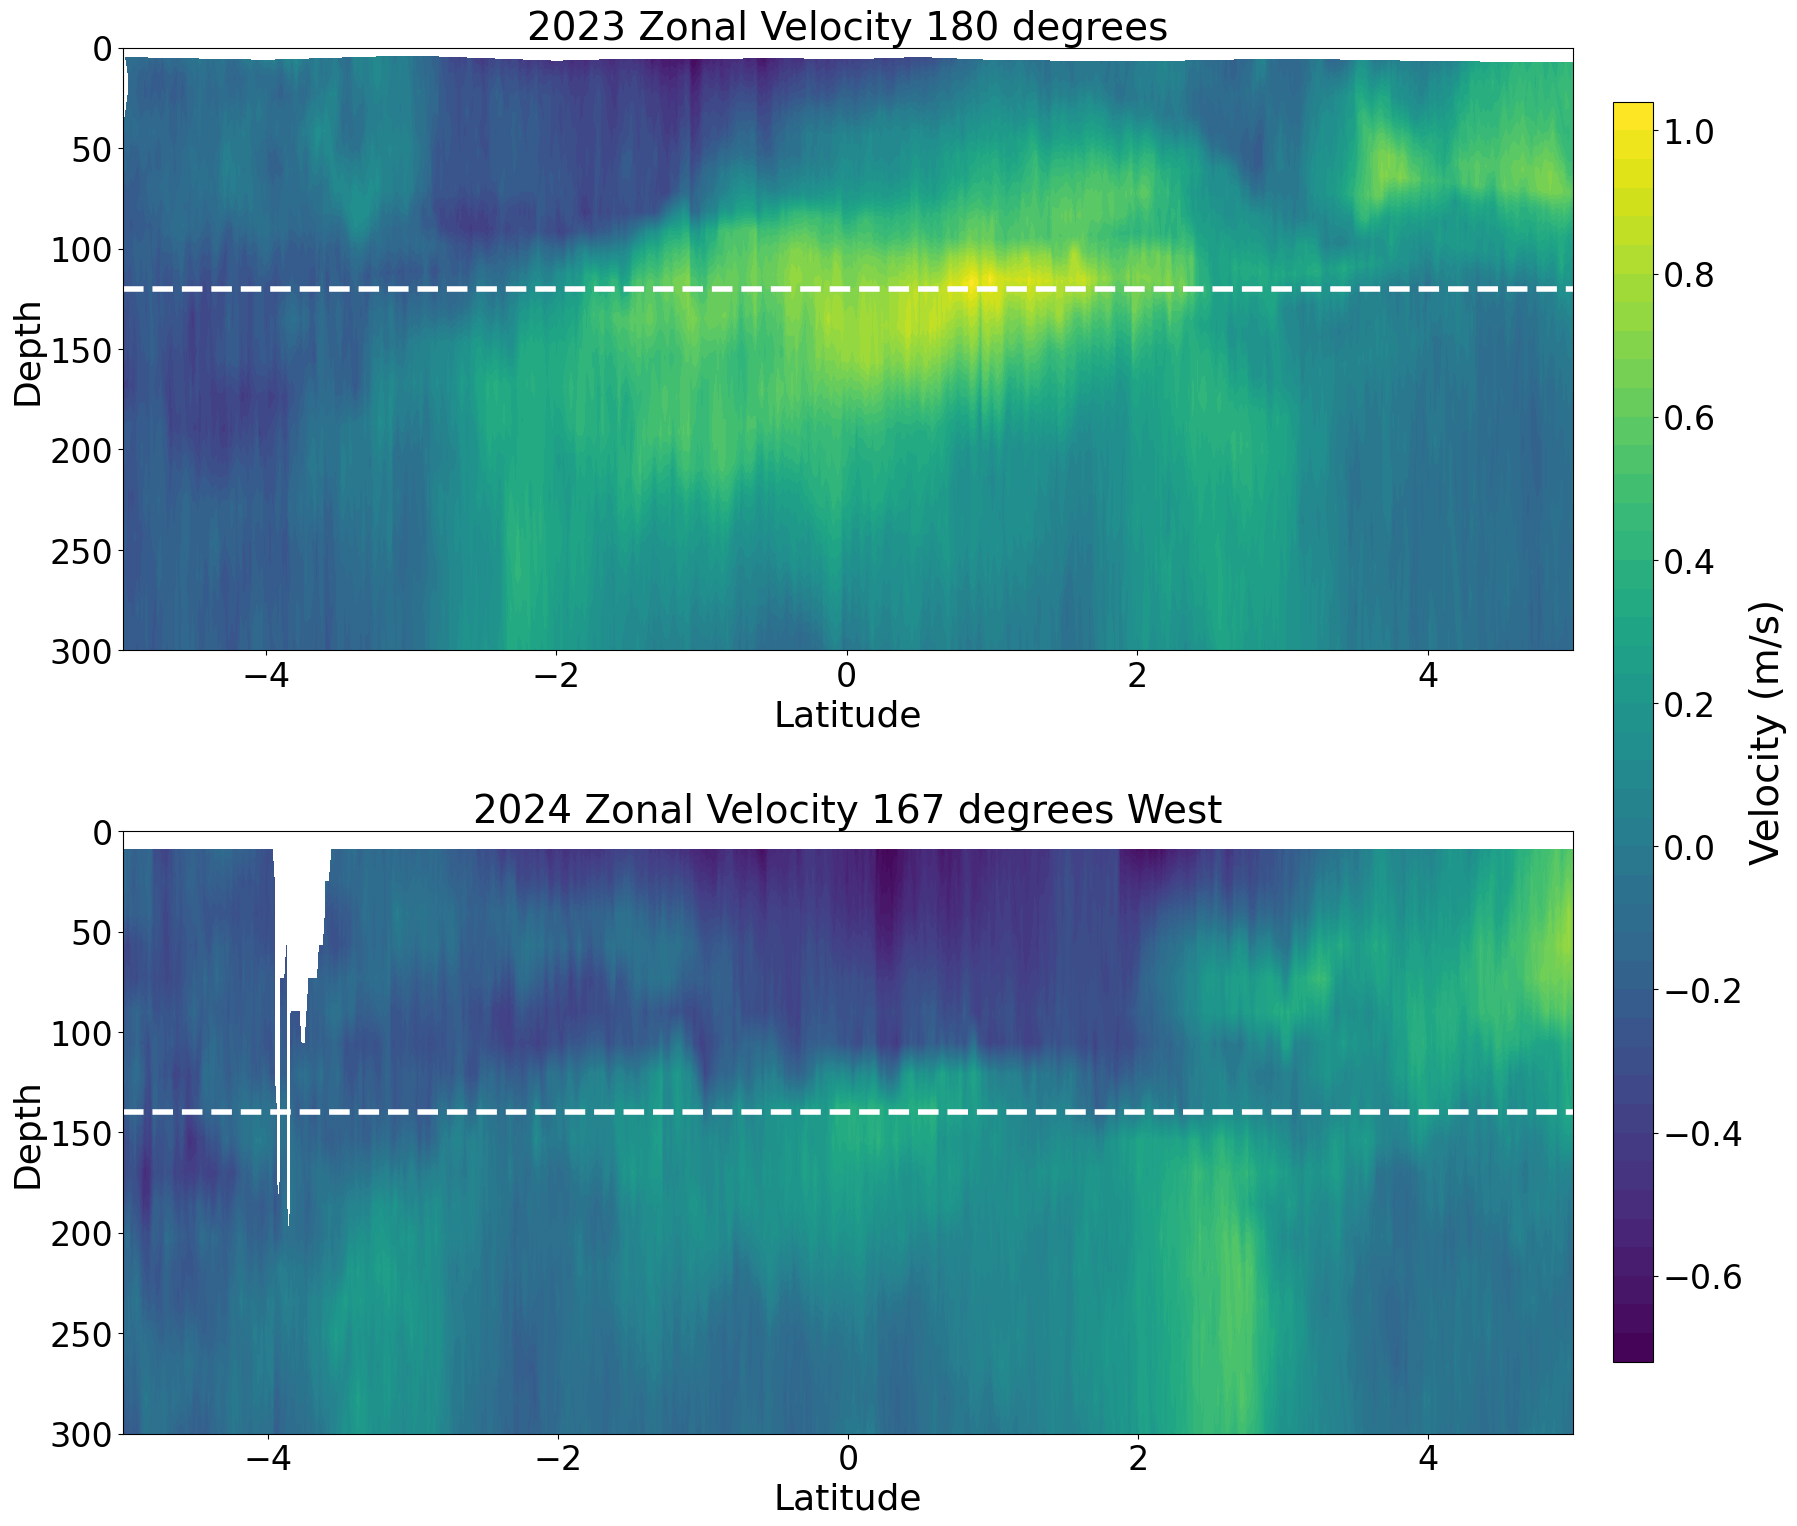

In [103]:
# Create a grid of subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 18))
max_value = max(np.nanmax(u_2023.values), np.nanmax(u_2024.values))

# 2023 zonal velocity
contour1 = ax1.contourf(lat_binned_2023, P_binned_2023, u_2023, levels=50, cmap='viridis', vmax=max_value)
ax1.axhline(y=120, color='white', linestyle='--', linewidth = 4)
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Depth')
ax1.set_title('2023 Zonal Velocity 180 degrees')
ax1.set_ylim(0, 300)
ax1.invert_yaxis()

# 2024 zonal velocity
contour2 = ax2.contourf(lat_binned_2024, P_binned_2024, u_2024, levels=50, cmap='viridis', vmax=max_value)
ax2.axhline(y=140, color='white', linestyle='--', linewidth = 4)
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Depth')
ax2.set_title('2024 Zonal Velocity 167 degrees West')
ax2.set_ylim(0, 300)
ax2.invert_yaxis()

# Adjust the layout to include a common colorbar on the right side
plt.subplots_adjust(right=0.85, hspace=0.3)
cbar_ax = fig.add_axes([0.87, 0.15, 0.02, 0.7])
colorbar = plt.colorbar(contour1, cax=cbar_ax)
colorbar.set_label('Velocity (m/s)', fontsize=20+8)
plt.savefig('Zonal Velocity.png', dpi=300, bbox_inches='tight')
plt.show()


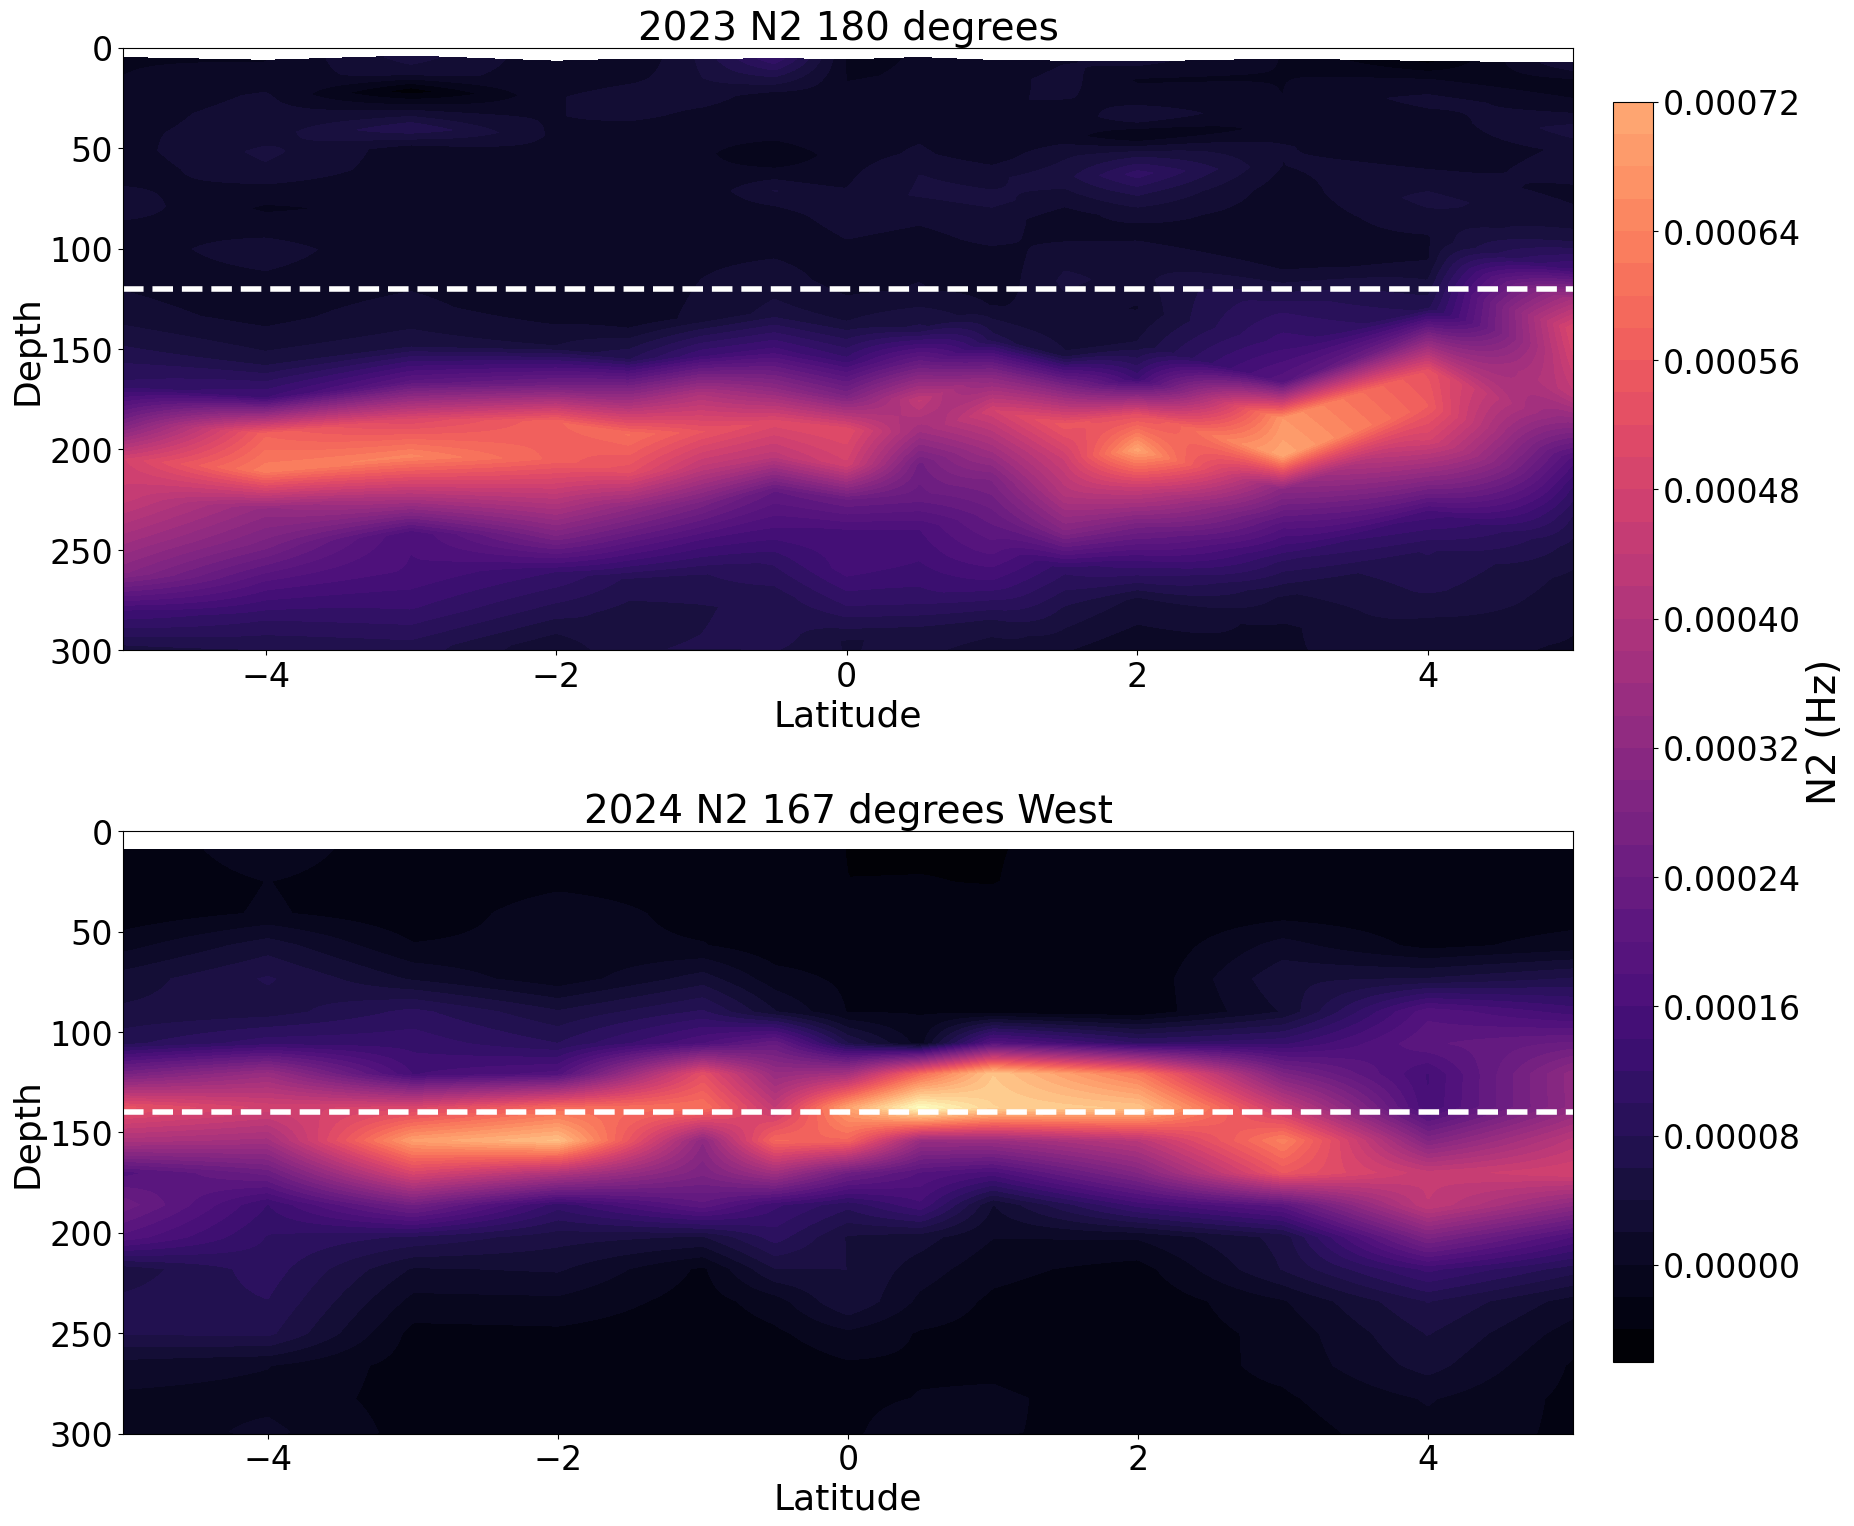

In [104]:
# Create a grid of subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 18))
max_value = max(np.nanmax(N2_2023.values), np.nanmax(N2_2024.values))

# 2023 N2
contour1 = ax1.contourf(lat_binned_2023, P_binned_2023, N2_2023, levels=50, cmap='magma', vmax=max_value)
ax1.axhline(y=120, color='white', linestyle='--', linewidth = 4)
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Depth')
ax1.set_title('2023 N2 180 degrees')
ax1.set_ylim(0, 300)
ax1.invert_yaxis()

# 2023 N2
contour2 = ax2.contourf(lat_binned_2024, P_binned_2024, N2_2024, levels=50, cmap='magma', vmax=max_value)
ax2.axhline(y=140, color='white', linestyle='--', linewidth = 4)
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Depth')
ax2.set_title('2024 N2 167 degrees West')
ax2.set_ylim(0, 300)
ax2.invert_yaxis()

# Adjust the layout to include a common colorbar on the right side
plt.subplots_adjust(right=0.85, hspace=0.3)
cbar_ax = fig.add_axes([0.87, 0.15, 0.02, 0.7])
colorbar = plt.colorbar(contour1, cax=cbar_ax)
colorbar.set_label('N2 (Hz)', fontsize=20+8)

plt.savefig('N2.png', dpi=300, bbox_inches='tight')

plt.show()

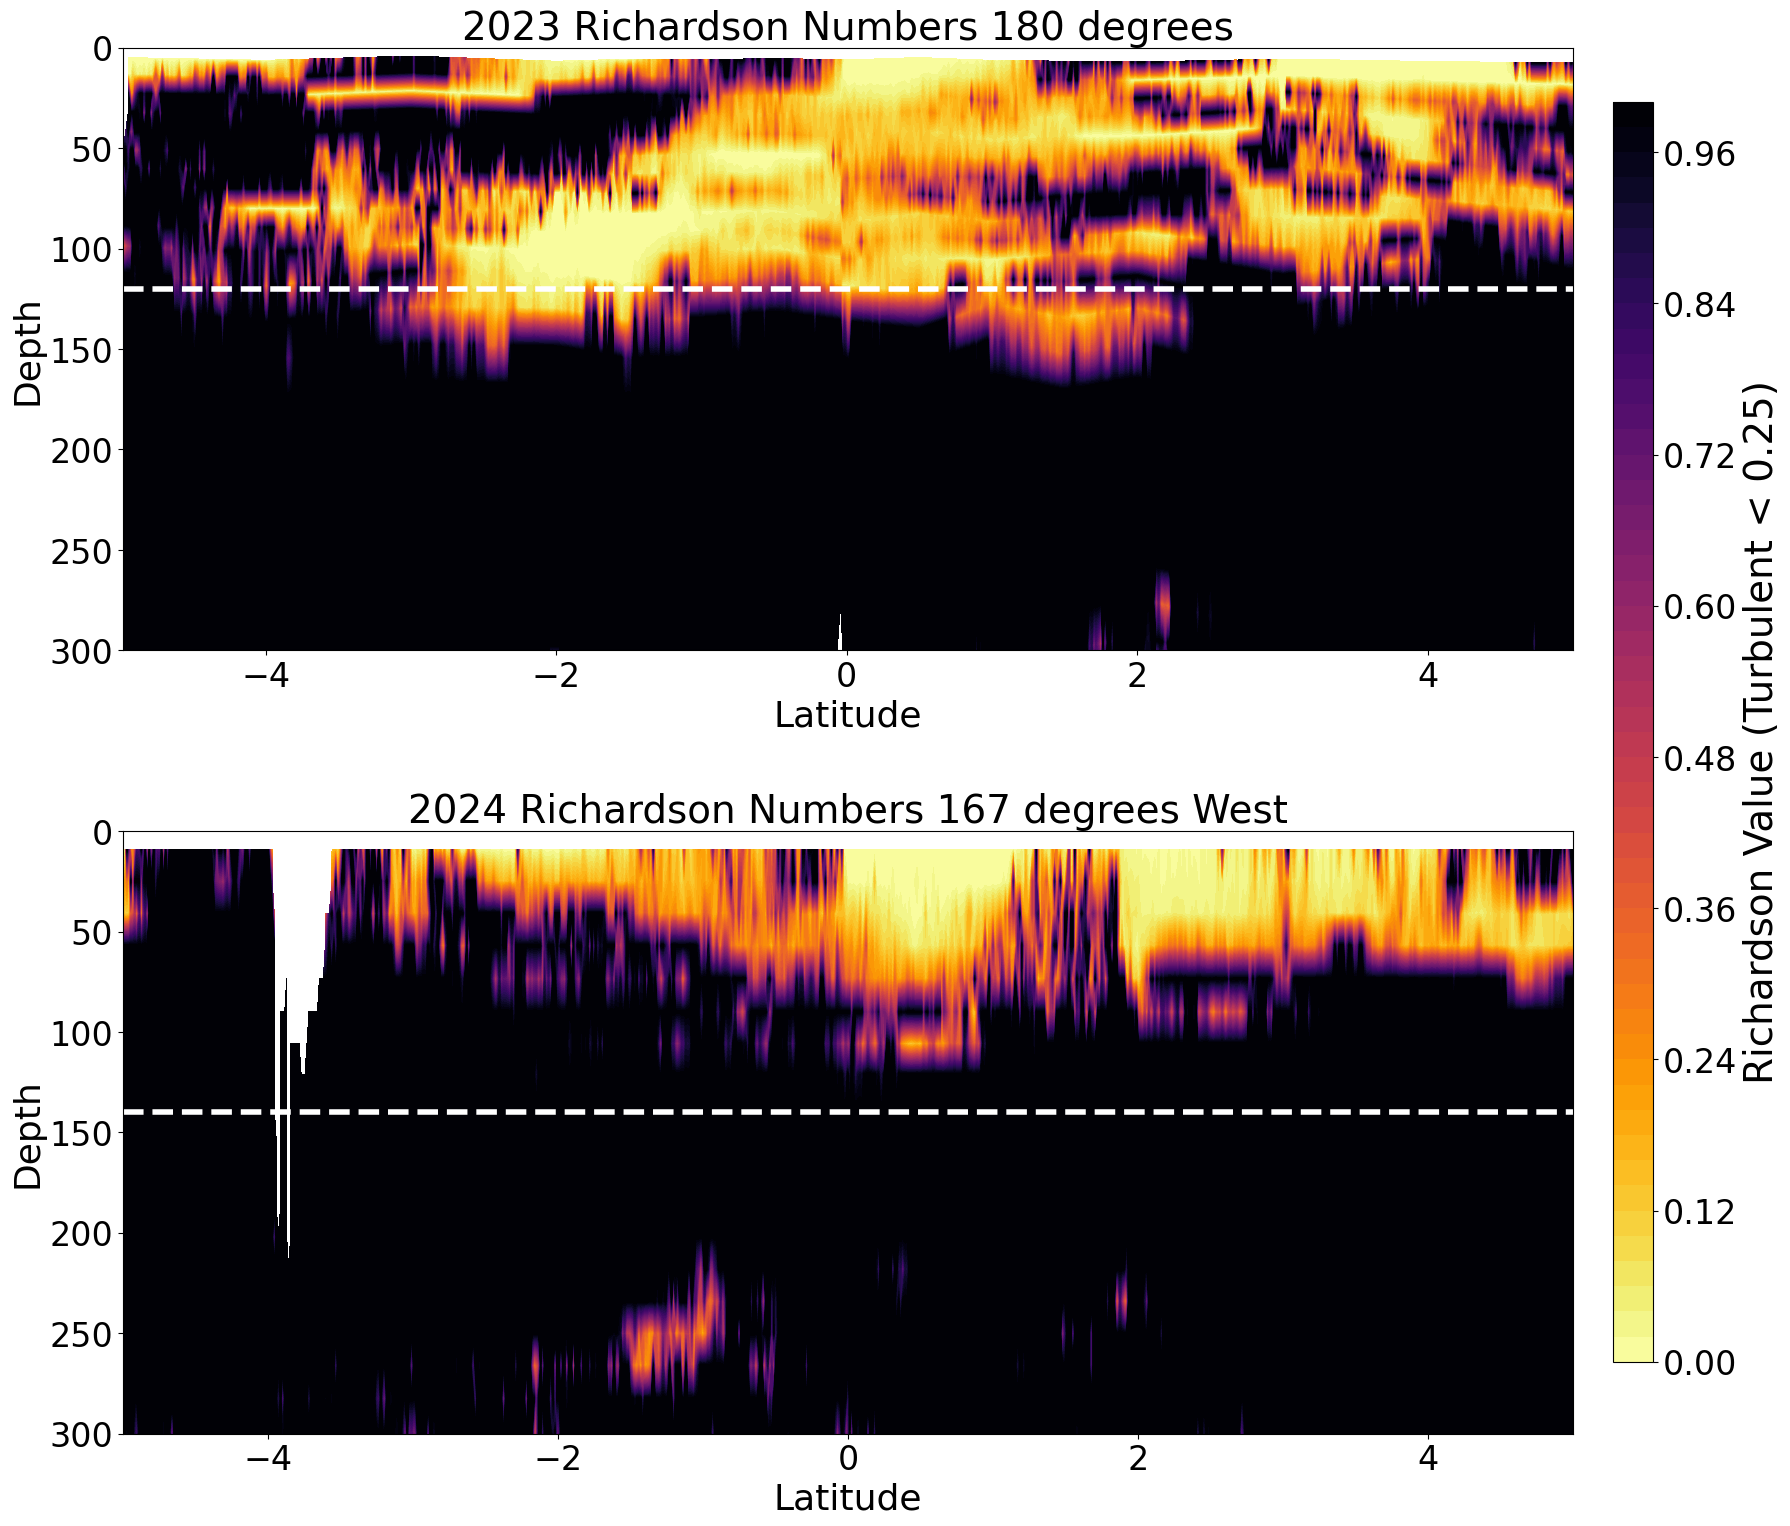

In [106]:
# Create a grid of subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 18))


visualize_ri_2023 = ri_2023.clip(lower=0, upper=1) # aide visualization
visualize_ri_2024 = ri_2024.clip(lower=0, upper=1) # aide visualization

max_value = max(np.nanmax(visualize_ri_2023.values), np.nanmax(visualize_ri_2024.values))

# 2023 ri
contour1 = ax1.contourf(lat_binned_2023, P_binned_2023, visualize_ri_2023, levels=50, cmap='inferno_r', vmax=max_value)
ax1.axhline(y=120, color='white', linestyle='--', linewidth = 4)
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Depth')
ax1.set_title('2023 Richardson Numbers 180 degrees')
ax1.set_ylim(0, 300)
ax1.invert_yaxis()

# 2023 ri
contour2 = ax2.contourf(lat_binned_2024, P_binned_2024, visualize_ri_2024, levels=50, cmap='inferno_r', vmax=max_value)
ax2.axhline(y=140, color='white', linestyle='--', linewidth = 4)
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Depth')
ax2.set_title('2024 Richardson Numbers 167 degrees West')
ax2.set_ylim(0, 300)
ax2.invert_yaxis()

# Adjust the layout to include a common colorbar on the right side
plt.subplots_adjust(right=0.85, hspace=0.3)
cbar_ax = fig.add_axes([0.87, 0.15, 0.02, 0.7])
colorbar = plt.colorbar(contour1, cax=cbar_ax)
colorbar.set_label('Richardson Value (Turbulent < 0.25)', fontsize=20+8)

plt.savefig('Ri.png', dpi=300, bbox_inches='tight')

plt.show()